For the purpose of this project, I will utilize a proprietary dataset retrieved from our Human Resources Information System (HRIS) platform, ADP. This comprehensive dataset includes complete records of payroll transactions from the period of January 2021 through May 2023. The structure of this dataset is organized, with rows representing individual employees, and columns denoting various categories such as payroll dates, amounts, and the respective companies the employees were affiliated with at the time of payroll issuance. As noted in the data dictionary below. 

My primary objective is to analyze this data by employing statistical methods and data analysis techniques. I will thoroughly cleanse and preprocess the data to ensure its optimal state for the subsequent predictive modeling.

Based on the insights drawn from the initial analysis, I will proceed to apply the most suitable machine learning model that aligns best with my objective - forecasting future payroll expenses. The intent is to develop a robust model that is capable of predicting payroll outflows, thereby assisting the organization in making more informed financial planning decisions.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

**Data Dictionary**

| Column Name                 | Description                                                        |
|:---------------------------|:-------------------------------------------------------------------|
| Company                    | The name or identifier of the company that the employee belongs to.|
| Employee ID                | A unique identifier for each employee in the company.               |
| Unique ID                  | Another unique identifier, used for specific purposes within the dataset.|
| Title                      | The job title or position of the employee within the company.      |
| Job Class                  | The job classification or category of the employee's position.     |
| Address State              | The state where the employee's address is located.                 |
| Hire Date                  | The date when the employee was hired by the company.               |
| Tenure                     | The length of time (in years) the employee has been working in the company.|
| Gender                     | The gender of the employee.                                       |
| Department At Payroll Process | The department to which the employee belongs at the time of payroll processing.|
| Payroll Code               | A code related to the employee's payroll transactions.           |
| G L Account Number         | The account number used in the company's General Ledger for financial payroll transactions.|
| G L Department             | The department in the company associated with financial transactions.|
| Post Date                  | The date when a transaction or entry was posted.                   |
| Description                | A description of the check date.   |
| Dollars                    | The amount of money involved in the transaction.         |
| Section Type               | The type or category of the payroll code.|
| Month                      | The month in which a particular event or transaction occurred.     |
| Year                       | The year in which a particular event or transaction occurred.      |

In [3]:
# Loading the data set and viewing dataframe.

df = pd.read_excel(r'C:\Users\mdyoung\OneDrive - Bankers Financial Corporation\Desktop\Bellevue\DCS630_T301_2237_1 - Predictive Analytics\Term Project\PR Detail 2021.01 - 2023.05.xlsx')
df

,Company,Employee I D,Unique ID,Title,Job Class,Address State,Hire Date,Tenure,Gender,Department At Payroll Process,Payroll Code,G L Account Number,G L Department,Post Date,Description,Dollars,Section Type,Month,Year
0,EBM,73730,EBM7373070199,401(k) / Benefits Specialist,Administrative Support Workers,Florida,2022-03-20,1.3,M,70199,CK1,1061000115,905000,20220408,04/08/2022 PAYROLL,-1696.52,Direct Deposit,4,2022
1,EBM,73730,EBM7373070199,401(k) / Benefits Specialist,Administrative Support Workers,Florida,2022-03-20,1.3,M,70199,EEFED,2204050000,905000,20220408,04/08/2022 PAYROLL,-175.59,Employee Federal Income Tax,4,2022
2,EBM,73730,EBM7373070199,401(k) / Benefits Specialist,Administrative Support Workers,Florida,2022-03-20,1.3,M,70199,EEFICA,2204200000,905000,20220408,04/08/2022 PAYROLL,-125.69,Employee Social Security Tax,4,2022
3,EBM,73730,EBM7373070199,401(k) / Benefits Specialist,Administrative Support Workers,Florida,2022-03-20,1.3,M,70199,EEMEDICARE,2204200000,905000,20220408,04/08/2022 PAYROLL,-29.40,Employee Medicare Tax,4,2022
4,EBM,73730,EBM7373070199,401(k) / Benefits Specialist,Administrative Support Workers,Florida,2022-03-20,1.3,M,70199,ERFICAEXP,7012000000,59070199,20220408,04/08/2022 PAYROLL,125.69,Employer Social Security Tax,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477919,EBM,3874,EBM387450599,Workers Compensation Claims Manager,First/Mid-Level Officials and Managers,Florida,2015-02-23,8.3,M,50599,K,2120000505,905000,20230519,05/19/2023 PAYROLL,-326.50,401K,5,2023
477920,EBM,3874,EBM387450599,Workers Compensation Claims Manager,First/Mid-Level Officials and Managers,Florida,2015-02-23,8.3,M,50599,REG,7001000000,59050599,20230519,05/19/2023 PAYROLL,4081.25,Regular Earnings,5,2023
477921,EBM,3874,EBM387450599,Workers Compensation Claims Manager,First/Mid-Level Officials and Managers,Florida,2015-02-23,8.3,M,50599,SLF,7042000040,59050599,20230519,05/19/2023 PAYROLL,-27.23,SPOS LIFE,5,2023
477922,EBM,3874,EBM387450599,Workers Compensation Claims Manager,First/Mid-Level Officials and Managers,Florida,2015-02-23,8.3,M,50599,STD,7042000041,59050599,20230519,05/19/2023 PAYROLL,-9.80,AT STD,5,2023


In [4]:
# Summary of data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477924 entries, 0 to 477923
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Company                        477924 non-null  object        
 1   Employee I D                   477924 non-null  int64         
 2   Unique ID                      477924 non-null  object        
 3   Title                          477924 non-null  object        
 4   Job Class                      477924 non-null  object        
 5   Address State                  477924 non-null  object        
 6   Hire Date                      477924 non-null  datetime64[ns]
 7   Tenure                         477924 non-null  float64       
 8   Gender                         477924 non-null  object        
 9   Department At Payroll Process  477924 non-null  int64         
 10  Payroll Code                   477821 non-null  object        
 11  

 - The data file has 477,924 rows and 19 columns.
 - The data types contain both object and numerical vlaues.
 - Will remove some of the object columns as they will not be needed for modeling.  Such as Employee I D. 

In [5]:
# Viewing stat summary for numerical columns.

df.describe()

,Employee I D,Hire Date,Tenure,Department At Payroll Process,G L Account Number,G L Department,Post Date,Dollars,Month,Year
count,477924.000000,477924,477924.000000,477924.000000,4.779240e+05,4.779240e+05,4.779240e+05,477924.000000,477924.000000,477924.000000
mean,59330.341301,2015-03-19 14:26:38.654179584,8.291013,53093.500276,4.417767e+09,9.960172e+07,2.021816e+07,-0.000143,5.908617,2021.755072
min,54.000000,1968-06-10 00:00:00,0.200000,10308.000000,1.061000e+09,9.050000e+05,2.021012e+07,-320692.800000,1.000000,2021.000000
25%,3469.000000,2012-09-04 00:00:00,3.000000,24599.000000,2.204050e+09,9.050000e+05,2.021081e+07,-118.460000,3.000000,2021.000000
50%,7587.000000,2017-07-31 00:00:00,5.900000,50899.000000,2.204200e+09,9.050000e+05,2.022032e+07,-21.040000,5.000000,2022.000000
75%,8632.000000,2020-06-22 00:00:00,10.800000,80108.000000,7.013000e+09,7.002420e+07,2.022102e+07,5.790000,9.000000,2022.000000
max,999970.000000,2023-05-09 00:00:00,55.100000,98107.000000,7.952001e+09,6.077910e+08,2.023052e+07,429807.000000,12.000000,2023.000000
std,202932.132222,NaN,7.739738,28269.275908,2.511857e+09,1.718216e+08,7.094773e+03,2491.092212,3.534687,0.719094


In [6]:
# Viewing stat summary for non-numerical columns.

df.describe(include = ['O'])

,Company,Unique ID,Title,Job Class,Address State,Gender,Payroll Code,Description,Section Type
count,477924,477924,477924,477924,477924,477924,477821,477924,477902
unique,8,859,316,6,32,2,112,39,166
top,EBM,EBM771950599,Customer Experience Specialist I,Administrative Support Workers,Florida,F,EEMEDICARE,2021-12-31 00:00:00,Employer Medicare Tax
freq,124108,1603,18625,220532,389013,292263,30110,196430,58976


In [7]:
# Checking for missing values to ensure data completeness. 

df.isnull().sum()

Company                            0
Employee I D                       0
Unique ID                          0
Title                              0
Job Class                          0
Address State                      0
Hire Date                          0
Tenure                             0
Gender                             0
Department At Payroll Process      0
Payroll Code                     103
G L Account Number                 0
G L Department                     0
Post Date                          0
Description                        0
Dollars                            0
Section Type                      22
Month                              0
Year                               0
dtype: int64

There are some missing values we will need to handle. In this case, I will drop the columns as they are redundant.  First I will check account totals by year.  

In [8]:
# Defining a function to format currency.
def format_currency(x):
    return "${:,.2f}".format(x)

# Create the pivot table
pivot_table = df.pivot_table(
    index='G L Account Number',
    columns='Year',
    values='Dollars',
    aggfunc=np.sum
)

# Apply the function to the pivot table
formatted_pivot_table = pivot_table.applymap(format_currency)

formatted_pivot_table

Year,2021,2022,2023
G L Account Number,,,
1061000115,"$-26,377,651.76","$-32,076,465.46",$nan
1201000101,"$90,313.55","$212,258.78","$97,192.46"
1204100000,"$-3,023.06",$nan,$nan
1901200005,$nan,$nan,"$-13,320,935.03"
2120000504,"$-12,254.00","$-13,895.40","$-5,597.50"
2120000505,"$-2,874,416.18","$-3,164,421.61","$-1,362,519.61"
2120000506,"$-24,433.19","$-39,153.41","$-17,176.56"
2120000507,"$-178,110.01","$-214,989.65","$-86,887.20"
2120000514,"$-273,285.92","$-355,178.62","$-170,079.86"


In [12]:
# Define the desired G L Account Numbers
desired_gl_numbers = [7001000000, 7004000000, 6010000000]

# Filter the DataFrame to include only the desired G L Account Numbers
filtered_df = df[df['G L Account Number'].isin(desired_gl_numbers)]

# Group by 'Section Type' and 'G L Account Number' and sum the 'Dollars'
section_gl_sum = filtered_df.groupby(['G L Account Number',
                                      'Section Type'])['Dollars'].sum().reset_index(name='Total Dollars')

# Function to format currency
def format_currency(x):
    return "${:,.2f}".format(x)

# Apply the function to the 'Total Dollars' column
section_gl_sum['Total Dollars'] = section_gl_sum['Total Dollars'].apply(format_currency)

# Print the filtered table
print("Filtered Table - Section Type and G L Account Number with Total Dollars:")
section_gl_sum

Filtered Table - Section Type and G L Account Number with Total Dollars:


,G L Account Number,Section Type,Total Dollars
0,6010000000,COMM BOND,"$2,294,870.41"
1,7001000000,ADJUST,"$-2,773.08"
2,7001000000,BEREAVMNT,"$34,273.20"
3,7001000000,Earnings (PYT),"$59,303.63"
4,7001000000,FLOAT HOL,"$64,690.96"
5,7001000000,FMLA,"$35,157.77"
6,7001000000,HOLIDAY,"$660,417.39"
7,7001000000,Inclmnt Wthr,"$11,210.35"
8,7001000000,JURY DUTY,"$4,589.18"
9,7001000000,Miscellaneous,$171.60


- Given the information in the above pivot table, I can see that I only want to use the GL Accounts 6010000000 and 7001000000 though 7004000000 as these are the base earnings code accounts from our data dictionary for commissions and regular base calculation wages. 

In [13]:
# Dropping features that are redundant and unnessecary to analysis for earnings.

# Define the list of accounts to keep
accounts_to_keep = [6010000000, 7001000000, 7004000000]

# Drop features that are redundant and unnecessary for analysis for earnings
df_drop = df.drop(['Employee I D','Company', 'Payroll Code', 'Description', 'Unique ID',
                   'Section Type','Post Date',
                   'G L Department','Hire Date'], axis=1)

# Filter the DataFrame to only include the specified accounts
df_drop = df_drop[df_drop['G L Account Number'].isin(accounts_to_keep)]

# Display the first 10 rows of the updated DataFrame
df_drop.head(10)

,Title,Job Class,Address State,Tenure,Gender,Department At Payroll Process,G L Account Number,Dollars,Month,Year
12,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,1216.32,4,2022
13,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,810.88,4,2022
27,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,2027.20,4,2022
41,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,2027.20,5,2022
55,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,2027.20,5,2022
66,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,2027.20,6,2022
76,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,202.72,6,2022
78,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,1837.15,6,2022
89,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,2027.20,7,2022
99,401(k) / Benefits Specialist,Administrative Support Workers,Florida,1.3,M,70199,7001000000,202.72,7,2022


In [14]:
df_drop.shape

(39538, 10)

In [15]:
# Checking for missing values to ensure data completeness after droping rows and columns. 

df_drop.isnull().sum()

Title                            0
Job Class                        0
Address State                    0
Tenure                           0
Gender                           0
Department At Payroll Process    0
G L Account Number               0
Dollars                          0
Month                            0
Year                             0
dtype: int64

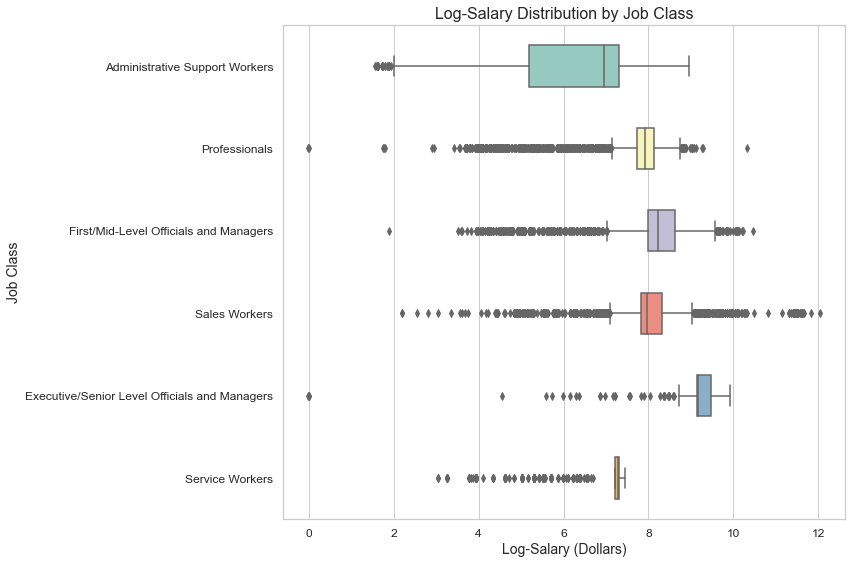

In [20]:
# Apply logarithm transformation to the 'Dollars' column
df_drop['Log_Dollars'] = np.log1p(df_drop['Dollars'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a larger box plot with spread-out dots using the transformed data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_drop, x='Log_Dollars', y='Job Class', orient='h', palette="Set3", width=0.5)  # Adjust the width

# Set the title and axis labels
plt.title('Log-Salary Distribution by Job Class', fontsize=16)
plt.xlabel('Log-Salary (Dollars)', fontsize=14)
plt.ylabel('Job Class', fontsize=14)

# Adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Given the dataset, I expected the outliers. Outliers can indicate individuals with salaries significantly higher or lower than the majority of the job class, refelcting reality. They will remain in the dataset to genereate tailored approaches when needed or can be addressed at a later date for removal depending on model need. The spread of dots within each box represents the distribution of log-salaries within that job class. A wider spread implies more variability in log-salaries within that class.

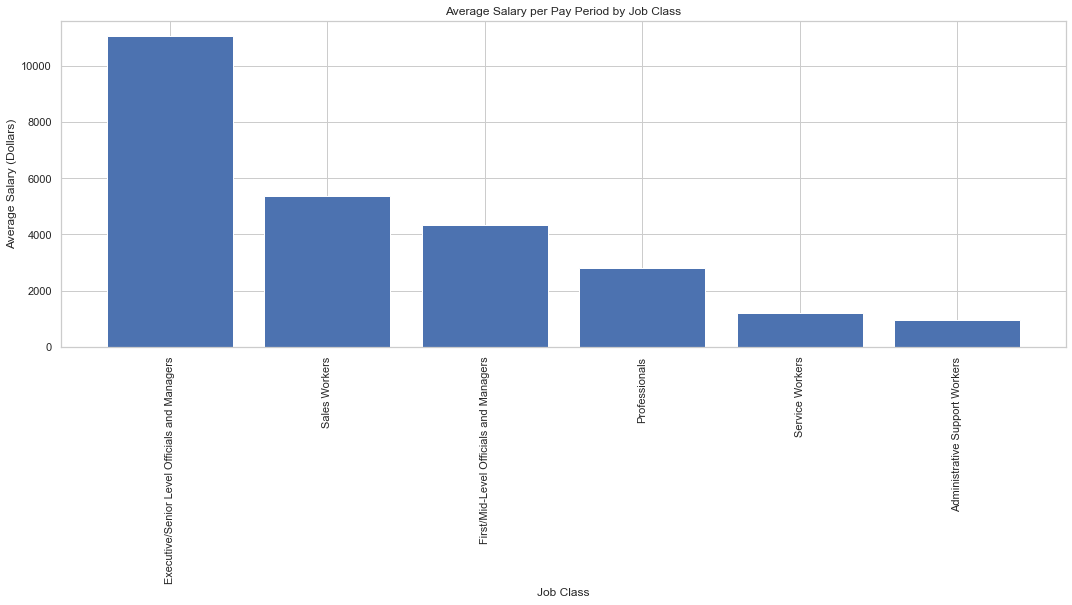

In [21]:
data = df_drop

# Calculate average salary by job title
average_salary = data.groupby('Job Class')['Dollars'].mean().reset_index()

# Sort the data by average salary in descending order
average_salary = average_salary.sort_values('Dollars', ascending=False)

# Create a bar plot
plt.figure(figsize=(18, 6))
plt.bar(average_salary['Job Class'], average_salary['Dollars'])
plt.xlabel('Job Class')
plt.ylabel('Average Salary (Dollars)')
plt.title('Average Salary per Pay Period by Job Class')
plt.xticks(rotation=90)
plt.show()

                         Feature  Correlation Coefficient
0                          Title                 0.840511
1                      Job Class                 0.843788
2                  Address State                 0.761201
3                         Gender                 0.591082
4                         Tenure                 0.169975
5             G L Account Number                -0.100014
6                          Month                -0.009227
7                           Year                 0.036250
8  Department At Payroll Process                -0.126170


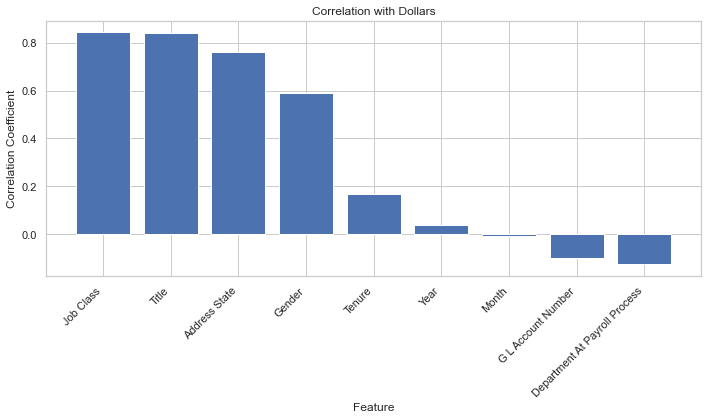

In [22]:
from scipy.stats import chi2_contingency, pearsonr

# Assuming your DataFrame is named 'data'
data = df_drop

# Select the relevant columns for correlation analysis
categorical_features = ['Title', 'Job Class', 'Address State', 'Gender']
numeric_features = ['Tenure', 'G L Account Number', 'Month', 'Year',
                    'Department At Payroll Process']
target_variable = 'Dollars'

# Create an empty DataFrame to store the results
correlation_df = pd.DataFrame(columns=['Feature', 'Correlation Coefficient'])

# Compute the correlation for each categorical feature
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * min(contingency_table.shape) - 1))
    correlation_df = pd.concat([correlation_df, pd.DataFrame({'Feature': 
                                                              [feature], 'Correlation Coefficient': 
                                                              [cramers_v]})], ignore_index=True)

# Compute the correlation for each numeric feature
for feature in numeric_features:
    correlation_coef, _ = pearsonr(data[feature], data[target_variable])
    correlation_df = pd.concat([correlation_df, pd.DataFrame({'Feature': [feature],
                                                              'Correlation Coefficient': 
                                                              [correlation_coef]})], ignore_index=True)

# Display the correlations
print(correlation_df)

# Sort the DataFrame by 'Correlation Coefficient' in descending order
correlation_df = correlation_df.sort_values(by='Correlation Coefficient', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(correlation_df)), correlation_df['Correlation Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation with Dollars')
plt.xticks(range(len(correlation_df)), correlation_df['Feature'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In this code, we iterate over each categorical feature and compute the Cramér's V value using the chi-square test and contingency tables. The Cramér's V values are then stored in a DataFrame called association_df. The resulting DataFrame displays the associations between each categorical feature and the "Dollars" variable.

In [30]:
# Load data and select features
data = df_drop
features = ['Title', 'Job Class', 'Address State', 'Tenure', 'Gender',
            'Department At Payroll Process', 'G L Account Number', 'Dollars', 'Month', 'Year']
data = data[features]

# Encode categorical variables
categorical_features = ['Title', 'Job Class', 'Address State', 'Gender',
                        'Department At Payroll Process',
                        'G L Account Number', 'Month', 'Year']

# Collect all unique values for each categorical feature
unique_values = {}
for feature in categorical_features:
    unique_values[feature] = data[feature].unique()

# Encode the categorical variables
for feature in categorical_features:
    encoder.classes_ = unique_values[feature]
    data[feature] = encoder.transform(data[feature])

# Split data into features (X) and target variable (y)
X = data.drop('Dollars', axis=1)
y = data['Dollars']

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)
}

# Initialize dictionaries to store results
mae_results = {}
r2_results = {}

# Train and evaluate models
for model_name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_results[model_name] = mae
    r2_results[model_name] = r2

# Print MAE and R2 for each model
for model_name, mae in mae_results.items():
    print(f"{model_name} - MAE: {mae:.2f}")

for model_name, r2 in r2_results.items():
    print(f"{model_name} - R2 Score: {r2:.2f}")

Linear Regression - MAE: 1257.03
Random Forest Regression - MAE: 517.28
Gradient Boosting Regression - MAE: 825.75
XGBoost Regression - MAE: 519.31
Linear Regression - R2 Score: 0.25
Random Forest Regression - R2 Score: 0.90
Gradient Boosting Regression - R2 Score: 0.81
XGBoost Regression - R2 Score: 0.91


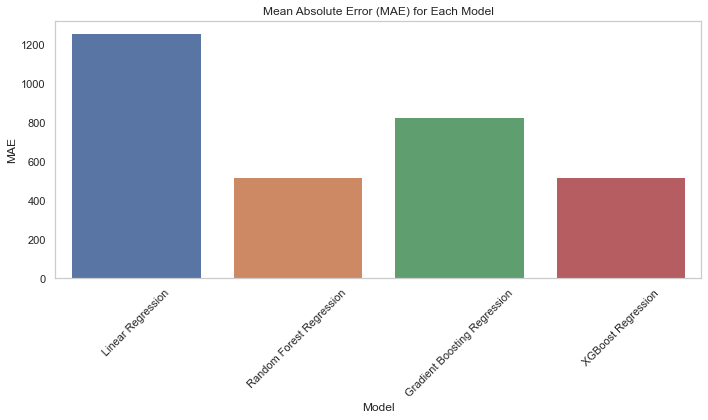

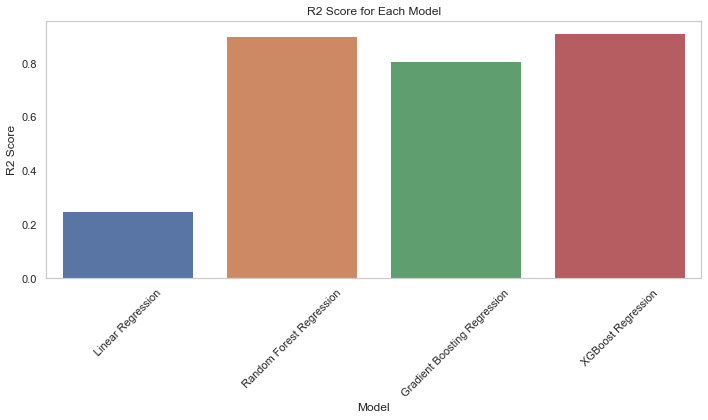

In [31]:
# Store MAE and R2 scores in dataframes
mae_df = pd.DataFrame.from_dict(mae_results, orient='index', columns=['MAE'])
r2_df = pd.DataFrame.from_dict(r2_results, orient='index', columns=['R2 Score'])

# Plot the MAE results on a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mae_df.index, y='MAE', data=mae_df)
plt.title('Mean Absolute Error (MAE) for Each Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot the R2 Score results on a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_df.index, y='R2 Score', data=r2_df)
plt.title('R2 Score for Each Model')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [32]:
# 6a. Model Deployment
# Saving the trained model and using it to predict salaries for new data
# Example: Predicting the salary for a new employee

new_employee = pd.DataFrame({'Title': ['Vice President'],
                             'Job Class': ['First/Mid-Level Officials and Managers'],
                             'Address State': ['Florida'],
                             'Tenure': [5],
                             'Gender': ['M'],
                             'Department At Payroll Process': ['28299'],
                             'G L Account Number': [7001000000],
                             'Month': [7],
                             'Year': [2023]
                             })

# Encode the categorical variables in the new employee data
for feature in categorical_features:
    encoder.classes_ = unique_values[feature]
    new_employee[feature] = encoder.transform(new_employee[feature])

# Making salary prediction for the new employee for month of July 2023
predicted_salary = model.predict(new_employee)

print("Predicted Annual Salary:","${:,.2f}".format(predicted_salary[0] * 26))

Predicted Annual Salary: $175,507.49


In [33]:
# 6b. Model Deployment
# Saving the trained model and using it to predict salaries for new data
# Example: Predicting the salary for a new employee

new_employee = pd.DataFrame({'Title': ['Vice President'],
                             'Job Class': ['First/Mid-Level Officials and Managers'],
                             'Address State': ['Florida'],
                             'Tenure': [5],
                             'Gender': ['F'],
                             'Department At Payroll Process': ['28299'],
                             'G L Account Number': [7001000000],
                             'Month': [7],
                             'Year': [2023]
                             })

# Encode the categorical variables in the new employee data
for feature in categorical_features:
    encoder.classes_ = unique_values[feature]
    new_employee[feature] = encoder.transform(new_employee[feature])

# Making salary prediction for the new employee for month of July 2023
predicted_salary = model.predict(new_employee)

print("Predicted Annual Salary:","${:,.2f}".format(predicted_salary[0] * 26))

Predicted Annual Salary: $173,161.40


Keeping the gender in the features could be cause for bias, I wanted to test for gender pay equality.  As we can see, with our dataset, pay seems to equivalent for test performed above. 

In [34]:
# 6c. Model Deployment
# Saving the trained model and using it to predict salaries for new data
# Example: Predicting monthly salaries for dataset

from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original data
data_filtered = df_drop.copy()

# Filter the data to include only the rows with Month = 5 and Year = 2023 for most recent actuals
data_filtered = data_filtered[(data_filtered['Month'] == 5) & (data_filtered['Year'] == 2023)]

# Extract the relevant columns for analysis
features = ['Title', 'Job Class', 'Address State', 'Tenure', 'Gender',
            'Department At Payroll Process',
            'G L Account Number', 'Dollars', 'Month', 'Year']
data_filtered = data_filtered[features]

# Encode categorical variables using LabelEncoder
categorical_features = ['Title', 'Job Class', 'Address State', 'Gender',
                        'Department At Payroll Process',
                        'G L Account Number', 'Month', 'Year']
encoder = LabelEncoder()

# Collect all unique values for each categorical feature
unique_values = {}
for feature in categorical_features:
    unique_values[feature] = data_filtered[feature].unique()

# Encode the categorical variables in the filtered data
for feature in categorical_features:
    encoder.classes_ = unique_values[feature]
    data_filtered[feature] = encoder.transform(data_filtered[feature])

# Split the filtered data into features (X) and target variable (y)
X_filtered = data_filtered.drop('Dollars', axis=1)
y_filtered = data_filtered['Dollars']

# Predict the salaries for the filtered data
predicted_salaries = model.predict(X_filtered)

# Calculate the total monthly salary for those paid within the specified month and year
total_monthly_salary = predicted_salaries.sum() 

print("Total Predicted Monthly Salary based upon May 2023:", "${:,.2f}".format(total_monthly_salary))
print("Total Predicted Annual Salary based upon May 2023:", "${:,.2f}".format(total_monthly_salary*12))

Total Predicted Monthly Salary based upon May 2023: $2,637,237.50
Total Predicted Annual Salary based upon May 2023: $31,646,850.00
